<a href="https://colab.research.google.com/github/g-roger/natural-language-process/blob/main/Aula_6_6_IA_PLN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Tópicos**

<font size=5>
Análise, ou Modelagem, de Tópicos nos permite analisar grandes volumes de texto atravéz de técnicas de clusterização ou agrupamento dos documentos em tópicos!
<br/>
<br/>
Grande parte dos dados disponíveis no mundo real não estão classificados e por isso não podemos aplicar as técnicas de aprendizado supervisionado que usamos anteriormente!
<br/>
<br/>

Nestes casos, onde trabalhamos com dados não classificados, podemos tentar encontrar suas classificações agrupando-os em tópicos.

  </font>




# Importante!

<font size=5>
Por não termos junto aos dados sua verdadeira classificação, nesses casos não sabemos a "resposta correta" o que torna muito difícil mensurar o quanto nosso algoritmo está acertando ou errando!
<br/>
<br/>

Tudo que sabemos (ou assumimos) é que documentos que forem agrupados no mesmo tópico compartilham ideias similares.
<br/>
<br/>

Fica a cargo do usuário (cientista/analista de dados, eng. machine learning e etc) se os grupos formados são coerentes e o que cada grupo representa!
</font>

# LDA - Latent Dirichlet Allocation

<font size=5>
LDA ou Latent Dirichlet Allocation é um “modelo probabilístico generativo” de uma coleção composta de partes. Em termos de modelagem de tópicos, as coleções são documentos e as partes são palavras, ou frases (n-gramas).  
<br/>
<br/>
O LDA tem esse nome pois usa a Distribuição Dirichlet (do matemático alemão Johann Peter Gustav Lejeune Dirichlet) para encontrar tópicos "latentes" nos documentos.
<br/>
<br/>
Em 2003, esse método foi publicado pela primeira vez por David Blei, Andrew Ng e Michael Jordan e pode ser
<a href="http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf">lido aqui</a>
<br/>
<br/>

Para entender melhor como o método funciona recomendo a leitura do artigo original no link acima!
  
</font>



# LDA

<font size=5>
Existem algumas premissas na aplicação do LDA:
<br/>
<br/>

1.   Documentos com assuntos similares usam palavras similares<br/>
2.   Os tópicos latentes podem ser encontrados atravez dos grupos de palavras que ocorrem juntas<br/>
3.   Documentos são distribuições de probabilidade sobre os tópicos latentes<br/>
4.   Tópicos são também distribuições de probabilidade sobre as palavras<br/>

</font>

# Documentos são distribuições de probabilidade sobre os tópicos latentes

![alt text](https://i.ibb.co/C2gs3mS/doc-prob-topics.png)

# Tópicos são também distribuições de probabilidade sobre as palavras

![alt text](https://i.ibb.co/KskDmbD/topic-prob-words.png)

In [ ]:
import pandas as pd

df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

df.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Bonecos Brinquedo Vingadores 30 Cm Com Luz E...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,maquiagem
freq,20,39,1020


In [ ]:
df.dropna(inplace=True)

df["texto"] = df['nome'] + " " + df['descricao']

In [ ]:
df.describe()

,nome,descricao,categoria,texto
count,2916,2916,2916,2916
unique,2584,2460,4,2646
top,Mais Escuro - Cinquenta Tons Mais Escuros Pel...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro,Bonecos Brinquedo Vingadores 30 Cm Com Luz E...
freq,20,39,838,20


In [ ]:
df.categoria.value_counts()

livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

stops = nltk.corpus.stopwords.words('portuguese')

vect = TfidfVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df.texto)
text_vect = vect.transform(df.texto)

#vect = CountVectorizer(ngram_range=(2,2), stop_words=stops)
#vect.fit(df.texto)
#text_vect = vect.transform(df.texto)

In [9]:
text_vect.shape

(2916, 35310)

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,
      test_size = 0.2, 
      random_state = 42
  )

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
      text_vect,
      df["categoria"],
      test_size = 0.2, 
      random_state = 42
  )

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=4,random_state=42)
LDA.fit(X_train)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
#LDA.score(X_test) // 1000
#LDA.score(X_test, y_test) // 1000

-60564.56904778924

In [ ]:
#LDA.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 42,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [ ]:
LDA.components_.shape

(4, 35310)

In [ ]:
LDA.components_[0]

array([1.9391718 , 0.75413679, 0.25005237, ..., 0.25      , 2.49118429,
       0.28116198])

In [ ]:
LDA.components_[0].argsort()

array([20239, 16668, 23147, ..., 22374, 20688, 26374])

In [ ]:
LDA.components_[0].argsort()[0]

20239

In [ ]:
vect.get_feature_names()[20239] #16668

'jet2'

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

In [ ]:
'''
0 - maquiagem
1 - games
2 - livros
3 - brinquedos
'''

In [ ]:
print(text_vect.shape)
print(X_train.shape)
print(X_test.shape)

print(X_train.shape[0]+X_test.shape[0])

(2916, 35310)
(2332, 35310)
(584, 35310)
2916


In [ ]:
results = LDA.transform(X_test)

results.shape

(584, 4)

In [ ]:
results[0]

array([0.06250539, 0.04448484, 0.04438344, 0.84862633])

In [ ]:
results.argmax(axis=1)

array([3, 0, 0, 3, 3, 2, 3, 0, 0, 3, 1, 2, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 2, 3, 3, 3, 0, 0, 3, 3, 2, 0, 0, 3, 2, 3, 0, 3, 3,
       1, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 0, 0, 0,
       3, 1, 0, 0, 3, 0, 0, 2, 2, 0, 0, 0, 3, 3, 3, 0, 2, 3, 3, 3, 3, 2,
       0, 0, 3, 2, 1, 2, 1, 1, 3, 2, 3, 2, 2, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 0, 1, 2, 0, 3, 3, 3, 0, 0, 3, 3,
       0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 2, 3, 2, 3, 0, 0, 0, 2, 3, 3,
       3, 2, 0, 3, 2, 3, 0, 3, 0, 3, 3, 1, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3,
       3, 3, 3, 1, 0, 3, 2, 0, 2, 1, 1, 3, 1, 2, 3, 3, 1, 0, 3, 0, 0, 2,
       3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 3, 0, 3, 0,
       3, 3, 3, 0, 3, 1, 2, 3, 3, 3, 0, 0, 0, 0, 0, 2, 3, 3, 3, 0, 0, 2,
       3, 0, 0, 0, 3, 3, 0, 2, 3, 0, 0, 0, 3, 2, 3, 2, 0, 2, 1, 0, 3, 2,
       3, 0, 1, 0, 2, 0, 0, 3, 2, 3, 3, 2, 3, 0, 3, 3, 3, 0, 0, 0, 0, 2,
       3, 0, 0, 0, 2, 3, 3, 3, 3, 2, 2, 0, 0, 3, 3,

In [ ]:
df_test['topico'] = results.argmax(axis=1)

df_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nome,descricao,categoria,texto,topico
2700,Estojo Duo Iluminador E Bronzer Belle Angel M...,DUO ILUMINADOR E BRONZER BELLE ANGEL - B025O D...,maquiagem,Estojo Duo Iluminador E Bronzer Belle Angel M...,3
1297,Patrulha Canina Carrinhos De Fricção 6 Person...,Kit carrinhos da Patrulha canina Tamanho: Cerc...,brinquedo,Patrulha Canina Carrinhos De Fricção 6 Person...,0
3162,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,#Nossos produtos são NOVOS e 100% ORIGINAIS# ...,game,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,0
2895,Kite Pincel 12 Unidade,esta alta qualidade Punho de madeira Escova Co...,maquiagem,Kite Pincel 12 Unidade esta alta qualidade ...,3
2226,Maleta Grande P/ Maquiagem Profissional Rodin...,FOTOS REAIS DO PRODUTO - ENVIAMOS SUA MALETA C...,maquiagem,Maleta Grande P/ Maquiagem Profissional Rodin...,3


In [ ]:
import numpy as np

df_test['categ_cod'] = df_test.categoria.map(
    {'maquiagem': 0, 'game': 1, 'livro': 2, 'brinquedo':3}    
    )

#df_test['categ_cod'] = df_test.categ_cod.astype(np.int64)

df_test.head()

'''
0 - maquiagem
1 - games
2 - livros
3 - brinquedos
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'\n0 - maquiagem\n1 - games\n2 - livros\n3 - brinquedos\n'

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 2700 to 1842
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       584 non-null    object
 1   descricao  584 non-null    object
 2   categoria  584 non-null    object
 3   texto      584 non-null    object
 4   topico     584 non-null    int64 
 5   categ_cod  584 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 31.9+ KB


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(df_test.categ_cod, df_test.topico))

0.1660958904109589


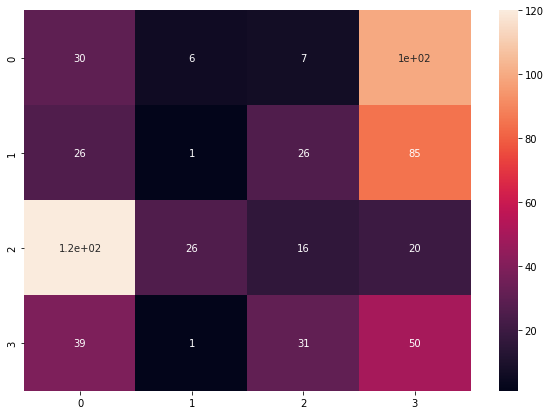

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(df_test.categ_cod, df_test.topico)

df_cm = pd.DataFrame(matrix, index=list('0123'),
                  columns=list('0123'))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [ ]:
# Corrija a classificação: {'maquiagem': 0, 'game': 3, 'livro': 2, 'brinquedo':1}

<font size=5>
<b>max_df:</b> float in range [0.0, 1.0] or int, default=1.0<br/>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.<br/>
Google T: Ao criar o vocabulário, ignore os termos que tenham uma frequência de documento estritamente maior que o limite fornecido (palavras de parada específicas do corpus). Se flutuante, o parâmetro representa uma proporção de documentos, número absoluto de contagens. Este parâmetro será ignorado se o vocabulário não for Nenhum.
<br/>
<br/>

<b>min_df:</b> float in range [0.0, 1.0] or int, default=1<br/>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.<br/>
Google T: Ao criar o vocabulário, ignore os termos que tenham uma frequência de documento estritamente menor que o limite especificado. Esse valor também é chamado de corte na literatura. Se flutuante, o parâmetro representa uma proporção de documentos, número absoluto de contagens. Este parâmetro será ignorado se o vocabulário não for Nenhum.
</font>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

stops = nltk.corpus.stopwords.words('portuguese')

vect = TfidfVectorizer(ngram_range=(2,2), stop_words=stops, max_df=0.9, min_df=2)
vect.fit(df.texto)
text_vect = vect.transform(df.texto)

df_train, df_test = train_test_split(
      df,
      test_size = 0.2, 
      random_state = 42
  )

X_train, X_test, y_train, y_test = train_test_split(
      text_vect,
      df["categoria"],
      test_size = 0.2, 
      random_state = 42
  )

LDA2 = LatentDirichletAllocation(n_components=4,random_state=42)
LDA2.fit(X_train)

#LDA2.score(text_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
for index,topic in enumerate(LDA2.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['efetuar pagamento', 'após envio', 'envio entrega', 'abaixo preço', 'úteis após', 'preço anúncio', 'pronta entrega', 'todos produtos', 'pagamento mercado', 'gta games', 'mercado livre', 'mercado pago', 'prazo entrega', 'prazo envio', 'mercado envios']


THE TOP 15 WORDS FOR TOPIC #1
['novo físico', 'cmidiomas portuguêsano', 'código barras', 'ed encadernação', 'origem nacional', 'nacional código', 'livromedidas cm', 'produto livromedidas', 'produto novo', 'ruby rose', 'mia vai', 'gel inglot', 'garota calendário', 'paleta sombras', 'delineador gel']


THE TOP 15 WORDS FOR TOPIC #2
['mercado livre', 'som luz', 'estoque envio', 'efetuar compra', 'vou retirar', 'retirar endereço', 'endereço vendedor', 'pode ser', 'vendedor combinar', 'envio imediato', 'posso jogar', 'combinar vendedor', 'original completo', '30 cm', 'jogar perfil']


THE TOP 15 WORDS FOR TOPIC #3
['boneco dragon', 'reaismandamos aproximadamente', 'feito frete', 'pronta entrega', 'ser feito', '

In [ ]:
results = LDA2.transform(X_test)

df_test['topico'] = results.argmax(axis=1)

df_test['categ_cod'] = df_test.categoria.map(
    {'maquiagem': 0, 'game': 3, 'livro': 2, 'brinquedo':1}
)
df_test['categ_cod'] = df_test.categ_cod.astype(np.int64)

print(accuracy_score(df_test.categ_cod, df_test.topico))

,nome,descricao,categoria,texto,topico,categ_cod
2700,Estojo Duo Iluminador E Bronzer Belle Angel M...,DUO ILUMINADOR E BRONZER BELLE ANGEL - B025O D...,maquiagem,Estojo Duo Iluminador E Bronzer Belle Angel M...,1,0
1297,Patrulha Canina Carrinhos De Fricção 6 Person...,Kit carrinhos da Patrulha canina Tamanho: Cerc...,brinquedo,Patrulha Canina Carrinhos De Fricção 6 Person...,1,1
3162,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,#Nossos produtos são NOVOS e 100% ORIGINAIS# ...,game,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,0,3
2895,Kite Pincel 12 Unidade,esta alta qualidade Punho de madeira Escova Co...,maquiagem,Kite Pincel 12 Unidade esta alta qualidade ...,1,0
2226,Maleta Grande P/ Maquiagem Profissional Rodin...,FOTOS REAIS DO PRODUTO - ENVIAMOS SUA MALETA C...,maquiagem,Maleta Grande P/ Maquiagem Profissional Rodin...,1,0
...,...,...,...,...,...,...
3058,Maleta Maquiagem 3d Jasmyne 105 Batons Sombra...,Maleta Jasmyne-32 sombras 3D ou matte-06 blush...,maquiagem,Maleta Maquiagem 3d Jasmyne 105 Batons Sombra...,3,0
3110,Cartão Presente Steam Gift Card R$ 200 Reais ...,.:: VOCÊ ESTÁ COMPRANDO COM A VR GAMERS ::.EST...,game,Cartão Presente Steam Gift Card R$ 200 Reais ...,1,3
1364,Kit Com 2 Pista Mágica Maluca Carros 3 Com Lu...,Pista Montável Relâmpago Mcqueen Jackson Storm...,brinquedo,Kit Com 2 Pista Mágica Maluca Carros 3 Com Lu...,2,1
641,Mais Escuro Cinquenta Tons Mais Escuros Pelos...,Sinopse:E L James revisita Cinquenta tons com ...,livro,Mais Escuro Cinquenta Tons Mais Escuros Pelos...,0,2


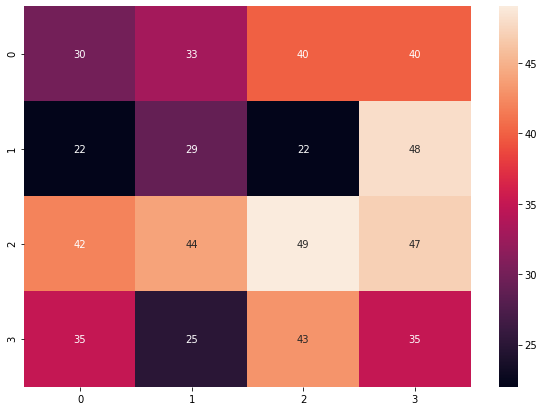

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(df_test.categ_cod, df_test.topico)

df_cm = pd.DataFrame(matrix, index=list('0123'),
                  columns=list('0123'))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [ ]:
df_train, df_test = train_test_split(
      df,
      test_size = 0.2, 
      random_state = 42
  )

X_train, X_test, y_train, y_test = train_test_split(
      text_vect,
      df["categoria"],
      test_size = 0.2, 
      random_state = 42
  )


In [ ]:
LDA3 = LatentDirichletAllocation(n_components=8,random_state=42)
LDA3.fit(X_train)

#LDA3.score(text_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
for index,topic in enumerate(LDA3.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['pacote incluindo', 'sobrancelhas prova', 'marrom pacote', 'duração alta', 'produto1 pc', 'incluindo caneta', 'tatuagem sobrancelha', 'prova agua', 'delineador sobrancelhas', 'dragon ball', 'midia digital', 'carrinho personagem', 'patrulha canina', 'pronta entrega', 'miss rose']


THE TOP 15 WORDS FOR TOPIC #1
['produto novo', 'antes compra', 'pincel profissional', 'maquiagem profissional', 'maleta profissional', 'envio imediato', 'sombras ruby', '18 cores', 'profissional grande', 'podem variar', 'campo perguntas', 'pronta entrega', 'maleta maquiagem', 'paleta sombras', 'ruby rose']


THE TOP 15 WORDS FOR TOPIC #2
['vingadores articuladosemite', 'led produto', 'luz led', 'pedimos compradores', 'compradores verificar', 'canal perguntas', '30 cm', 'perguntas respostas', 'mercado livre', 'disponibilidadeapós efetuar', 'verificar disponibilidadeapós', 'vingadores 30', 'envio imediato', 'efetuar compra', 'som luz']


THE TOP 15 WORDS FOR TOPIC #3
['ruby rose',

In [ ]:
results = LDA3.transform(X_test)

df_test['topico'] = results.argmax(axis=1)

df_test['categ_cod'] = df_test.categoria.map(
    {'maquiagem': 1, 'game': 2, 'brinquedo': 0, 'livro':3}
)
df_test['categ_cod'] = df_test.categ_cod.astype(np.int64)

print(accuracy_score(df_test.categ_cod, df_test.topico))

2700    3
1297    0
3162    0
2895    5
2226    3
       ..
3058    3
3110    2
1364    1
641     7
1842    5
Name: topico, Length: 584, dtype: int64

<br/>
<br/>
<br/>


##**O que aprendemos até aqui que mais marcou você?**
---

##**Vamos montar um projeto ideal?**

---

### O que precisamos ter para desenvolver um projeto em NLP onde o objetivo final ter uma base de dados classificada com uma predissão?

Use como exemplo nosso case de classificar produtos de um site com base no nome e descrição dos produtos.